## hello_sp.py

In [24]:
!python3 -m pydoc htm.algorithms.SpatialPooler

Help on class SpatialPooler in htm.algorithms:

hhttmm..aallggoorriitthhmmss..SSppaattiiaallPPoooolleerr = class SpatialPooler(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      SpatialPooler
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  ____ggeettssttaattee____(...)
 |      __getstate__(self: htm.bindings.algorithms.SpatialPooler) -> bytes
 |  
 |  ____iinniitt____(...)
 |      __init__(self: htm.bindings.algorithms.SpatialPooler, inputDimensions: List[int] = [32, 32], columnDimensions: List[int] = [64, 64], potentialRadius: int = 16, potentialPct: float = 0.5, globalInhibition: bool = False, localAreaDensity: float = 0.019999999552965164, numActiveColumnsPerInhArea: int = 0, stimulusThreshold: int = 0, synPermInactiveDec: float = 0.01, synPermActiveInc: float = 0.1, synPermConnected: float = 0.1, minPctOverlapDutyCycle: float = 0.001, dutyCyclePeriod: int =

In [29]:
"""空間プーラーの動作を示す簡単なプログラム"""

from htm.bindings.sdr import SDR
from htm.algorithms import SpatialPooler as SP

In [30]:
# Spatial Pooler と、それを使用するために必要な SDR データ構造を作成します

inputSDR  = SDR( dimensions = (32, 32) )
activeSDR = SDR( dimensions = (64, 64) )
sp = SP(inputDimensions  = inputSDR.dimensions,
        columnDimensions = activeSDR.dimensions,
        localAreaDensity = 0.02,
        globalInhibition = True,
        seed             = 1,
        synPermActiveInc   = 0.01,
        synPermInactiveDec = 0.008)

def run():
    print("Running the Spatial Pooler ...")
    print("")
    sp.compute(inputSDR, True, activeSDR)
    print("Active Outputs " + str(activeSDR))
    print("")
    
    import numpy as np
    import matplotlib.pyplot as plt
    from IPython.display import display, clear_output
    %matplotlib inline

    clear_output(wait = True)
    plt.cla
    plt.imshow(activeSDR.dense)
    plt.pause(0.01)

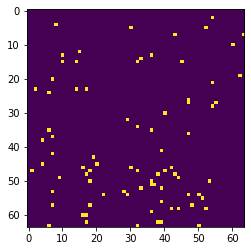

Spatial Pooler Connections:
    Inputs (1024) ~> Outputs (4096) via Segments (4096)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 512 / 512 / 512
    Connected Synapses on Segment Min/Mean/Max 218 / 256.035 / 301
    Synapses Dead (0.00230837%) Saturated (1.4782e-05%)
    Synapses pruned (0%) Segments pruned (0%)



In [31]:
# レッスン1 ランダム入力を試してみる
print("")
print("Hello Spatial Pooler.")
print("")
print("")
print("レッスン1）異なる入力は、異なる出力を与えます")
print("    3つのランダムな疎分散表現(SDR)を生成し、それぞれを実行します")
print("    空間プーラーを通して  出力アクティビティが毎回異なることを観察します")
print("")

for i in range(3):
    print("----------------------------------------------------------------------")
    inputSDR.randomize( .02 )
    print("Random Input " + str(inputSDR))
    print("")
    run()
print(sp)

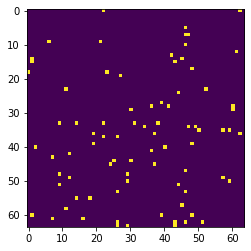

Spatial Pooler Connections:
    Inputs (1024) ~> Outputs (4096) via Segments (4096)
    Segments on Cell Min/Mean/Max 1 / 1 / 1
    Potential Synapses on Segment Min/Mean/Max 512 / 512 / 512
    Connected Synapses on Segment Min/Mean/Max 208 / 243.445 / 280
    Synapses Dead (0.22289%) Saturated (1.95503e-05%)
    Synapses pruned (0%) Segments pruned (0%)



In [28]:
# レッスン1 ランダム入力を試してみる
print("")
print("Hello Spatial Pooler.")
print("")
print("")
print("レッスン1）異なる入力は、異なる出力を与えます")
print("    3つのランダムな疎分散表現(SDR)を生成し、それぞれを実行します")
print("    空間プーラーを通して  出力アクティビティが毎回異なることを観察します")
print("")

for i in range(300):
    print("----------------------------------------------------------------------")
    inputSDR.randomize( .02 )
    print("Random Input " + str(inputSDR))
    print("")
    run()
print(str(sp))

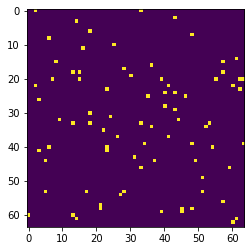

In [23]:
# レッスン２ 同一の入力を試す
print("=" * 70)
print("")
print("")
print("レッスン2) 同一の入力は同一の出力を与える")
print("    入力SDRは、空間プーラーの前の実行で使用されたものと同じである")
print("")
print("Input " + str(inputSDR))
print("")
run()

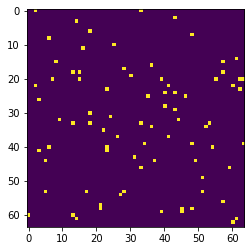

今までの出力SDRとは大きく異なります
しかし、出力の間にはまだ似たようなものがあります

End.


In [22]:
# レッスン3、似たような入力を試してみる
print("=" * 70)
print("")
print("")
print("レッスン3）似たような入力は似たような出力を与えます")
print("          今は入力SDRを少し変えています")
print("          1を0に、0を1に少しずつ変えていきます")
print("          結果として得られるSDRは、元のSDRと類似していますが、同一ではありません")
print("")

print("前の実行から入力SDRに10%のノイズを追加します")
inputSDR.addNoise(0.10)
print("Input " + str(inputSDR))
print("")
run()
print("出力SDRがほとんど変化していないことに注目してください")
print("")
print("")
print("入力SDRにさらに20%のノイズを追加")
inputSDR.addNoise(0.2)
print("Input " + str(inputSDR))
print("")
run()
print("今までの出力SDRとは大きく異なります")
print("しかし、出力の間にはまだ似たようなものがあります")
print("")
print("End.")